/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


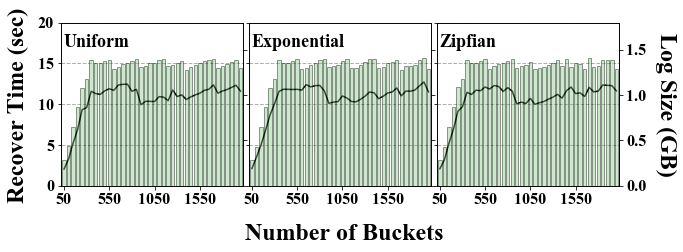

In [21]:
import re
import os
import csv
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from natsort import natsorted, ns
from scipy.fftpack import fft
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import NullFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 100
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
%matplotlib inline



fig = plt.figure(figsize=(10, 3)) 
gs = gridspec.GridSpec(6, 9) 
gs.update(wspace=0.1, hspace=0.5) # set the spacing between axes. 
ax = [1,2,3]
ax[0] = plt.subplot(gs[:,:3])
ax[1] = plt.subplot(gs[:,3:6])
ax[2] = plt.subplot(gs[:,6:9])


def billions(x, pos):
        return '%d' % (x * 50 + 50)
    
def Plot(ax1, filename, distribution, is_left=False, is_right=False):
    df = pd.read_csv(filename, names=["0", "time", "1", "bucket", "2", "size", "3"], header=None)
    df['size'] = df['size'] / 1000.0
    axt = ax1.twinx()
    df["time"].plot(ax=ax1, color='k' )
    df["size"].plot(ax=axt, kind="bar", colormap='Accent', width=0.75, edgecolor='k', alpha=0.4)
    
#     axt.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d GB'))
    axt.set_ylim([0, 1.8])    
    ax1.set_ylim([0, 20])
    ax1.text(0, 17, distribution, color='k', fontsize=18 )
#     ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d s'))
    ax1.set_axisbelow(True)
    ax1.set_xticks(range(0, 40, 10))
    ax1.get_xaxis().tick_bottom()
    formatter = FuncFormatter(billions)
    ax1.xaxis.set_major_formatter(formatter)
    if not is_left:
        ax1.set_yticklabels([])
    if not is_right:
        axt.set_yticklabels([])
    ax1.yaxis.grid(linewidth=1, linestyle='--')
    
Plot(ax[0], "log_recover_uniform.txt", "Uniform", True)
Plot(ax[1], "log_recover_exponential.txt", "Exponential")
Plot(ax[2], "log_recover_zipfian.txt", "Zipfian", False, True)


fig.text(0.38, -0.1, 'Number of Buckets', va='center', fontsize=24)
fig.text(0.05, 0.5, 'Recover Time (sec)', va='center', rotation='vertical', fontsize=24)
fig.text(0.95, 0.5, 'Log Size (GB)', va='center', rotation=-90, fontsize=24)
fig.tight_layout()
plt.savefig("LogRecover.pdf", bbox_inches='tight')